# Day 18
## Puzzle 1

In [176]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [177]:
# input_file = 'input_1.txt'
input_file = 'test_input_1.txt'

Read input with falling bytes.

In [178]:
with open(file=input_file, mode="r") as file:
    bytes_list = []

    for line in file:
        bytes_list.append([int(val) for val in line.strip().split(',')])

Create a map where tiles with "." are walkable and tiles with "#" are not. Only the first num_bytes_fallen bytes are added.

In [179]:
m = 71
num_bytes_fallen = 1024

if input_file.startswith('test'):
    m = 7
    num_bytes_fallen = 12

map_matrix = np.matrix([['.']*m]*m)

for byte_fallen in bytes_list[:num_bytes_fallen]:
    map_matrix[*byte_fallen] = '#'

In [180]:
map_matrix.T

matrix([['.', '.', '.', '#', '.', '.', '.'],
        ['.', '.', '#', '.', '.', '#', '.'],
        ['.', '.', '.', '.', '#', '.', '.'],
        ['.', '.', '.', '#', '.', '.', '#'],
        ['.', '.', '#', '.', '.', '#', '.'],
        ['.', '#', '.', '.', '#', '.', '.'],
        ['#', '.', '#', '.', '.', '.', '.']], dtype='<U1')

Connect walkable tiles/nodes that are adjacent.

In [181]:
edges = set()

for i in range(m):
    for j in range(m):
        current_node_value = map_matrix[i, j]

        if current_node_value == '.':
            if j + 1 < m:
                current_right_node_value = map_matrix[i, j + 1]

                if current_right_node_value == '.':
                    edges.add(((i, j), (i, j + 1)))
                
            if j - 1 >= 0:
                current_left_node_value = map_matrix[i, j - 1]

                if current_left_node_value == '.':
                    edges.add(((i, j), (i, j - 1)))

            if i + 1 < m:
                current_bottom_node_value = map_matrix[i + 1, j]

                if current_bottom_node_value == '.':
                    edges.add(((i, j), (i + 1, j)))

            if i - 1 >= 0:
                current_top_node_value = map_matrix[i - 1, j]

                if current_top_node_value == '.':
                    edges.add(((i, j), (i - 1, j)))

Create a graph.

In [182]:
G = nx.Graph()
G.add_edges_from(edges)

Find the length of the shortest path in the graph.

In [183]:
nx.shortest_path_length(G, source=(0, 0), target=(m - 1, m - 1))

22

## Puzzle 2

Iterate through the remaining falling byte nodes and check if they are precent in the graph. If they are, remove them from the graph and check if a path still exists from the start node to the end node. When there no longer exists a path, we have found our first byte which will cut all the paths between the start node to the end node.

In [184]:
G_copy = G.copy()
first_cutting_node = None

for current_byte in bytes_list[num_bytes_fallen:]:
    current_byte_node = tuple(current_byte)

    if current_byte_node in G_copy.nodes:
        G_copy.remove_node(current_byte_node)

        if not nx.has_path(G_copy, source=(0, 0), target=(m - 1, m - 1)):
            first_cutting_node = current_byte_node
            break

In [185]:
first_cutting_node

(6, 1)

Plots of the original graph and the graph were we have removed nodes until all paths between $(0, 0)$ and $(m - 1, m - 1)$ are blocked.

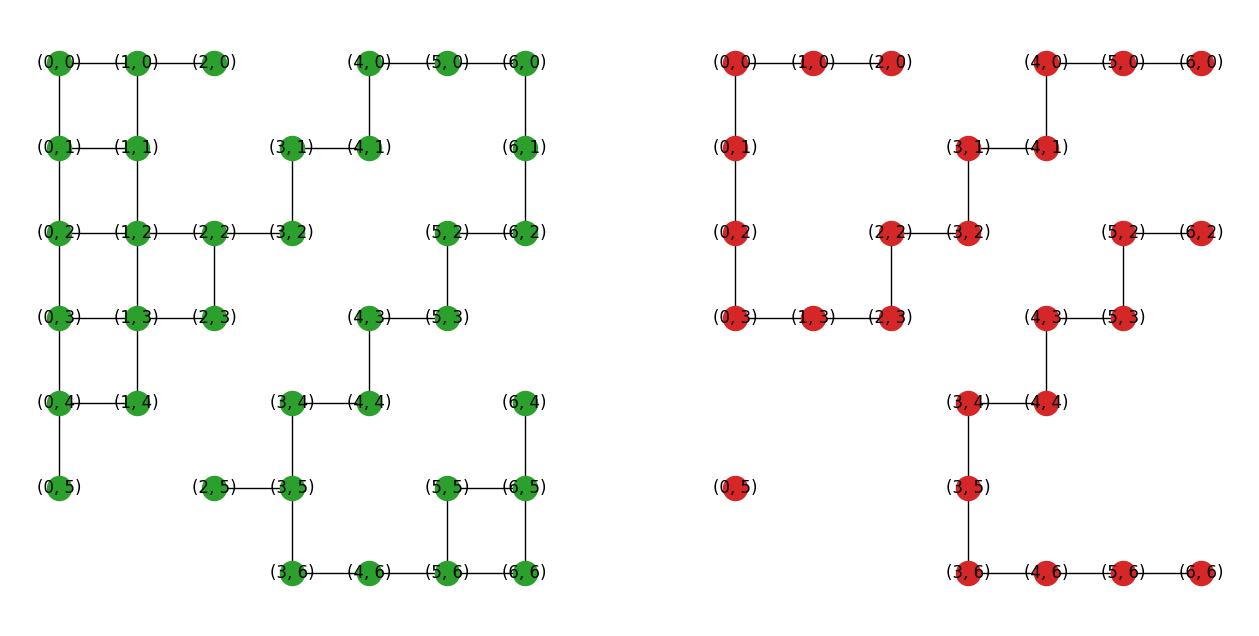

In [186]:
if input_file.startswith('test'):
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    nx.draw(G, pos={node: (node[0], -node[1]) for node in G.nodes}, with_labels=True, node_color='tab:green')
    plt.subplot(1, 2, 2)
    nx.draw(G_copy, pos={node: (node[0], -node[1]) for node in G_copy.nodes}, with_labels=True, node_color='tab:red')